__1__ Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [1]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]


X_norm = X.copy()
X_norm = X_norm.astype(np.float64)

for i in range(1,X_norm.shape[0]):
    X_norm[i] = (X[i] - X[i].min()) / (X[i].max() - X[i].min())

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err
    
def eval_model_reg2(lambda_):
    res = []
    for l in lambda_:
        np.random.seed(42)
        W = np.random.randn(X_norm.shape[0])
        n = X_norm.shape[1]
        for i in range(1, 5001):
            y_pred = np.dot(W, X_norm)
            err = calc_mse(y, y_pred)
            W -= 1e-2 * (1/n * 2 * np.dot((y_pred - y), X_norm.T) + l* W) 
        res.append(W)
    return res    
    


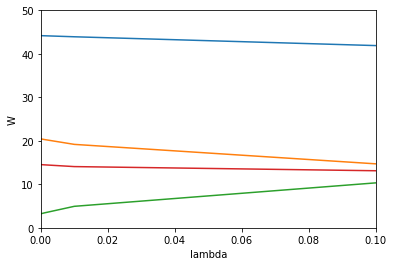

In [2]:
    
lambda__ = [1 / 10**i for i in range(10)]
res = eval_model_reg2(lambda__)

plt.xlabel('lambda')
plt.ylabel('W')
plt.ylim(0, 50)
plt.xlim(0,0.1)

plt.plot(lambda__, res)
plt.show()
#print(*res, sep='\n')

__2__ Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Применить можно, но зачем? Это лишние вычисления.
В зависимости от того, что мы применим последне, нормализацию или стандартизацию, то и признак будет нормализированным или стандартизированным.

__3__ Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [3]:
import numpy as np
def eval_model_reg(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W/np.abs(W)) 
    return W